# K Means Clustering

### An machine learning technique use to create cluster of specified number of 'k' and total variation of each k is ploted with elbow pllot and correct k is selected

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [2]:
rng=np.random.default_rng(seed=42)

In [3]:
data=np.sort(rng.random(size=(12,1)),axis=0)

In [4]:
print(data)
print(data.shape)
data_copy=data.ravel()
print(data_copy.shape)

[[0.09417735]
 [0.12811363]
 [0.37079802]
 [0.43887844]
 [0.45038594]
 [0.69736803]
 [0.7611397 ]
 [0.77395605]
 [0.78606431]
 [0.85859792]
 [0.92676499]
 [0.97562235]]
(12, 1)
(12,)


In [5]:
classifier=KMeans(n_clusters=3,random_state=0)
classifier.fit(data)

KMeans(n_clusters=3, random_state=0)

In [6]:
predicted_cluster=classifier.predict(data)
print(predicted_cluster)

[2 2 1 1 1 0 0 0 0 0 0 0]


C:\Users\Rahul\AppData\Local\Temp\ipykernel_14112\3094498192.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(predicted_cluster,label='Clustered data',palette='rainbow',ax=ax[1])


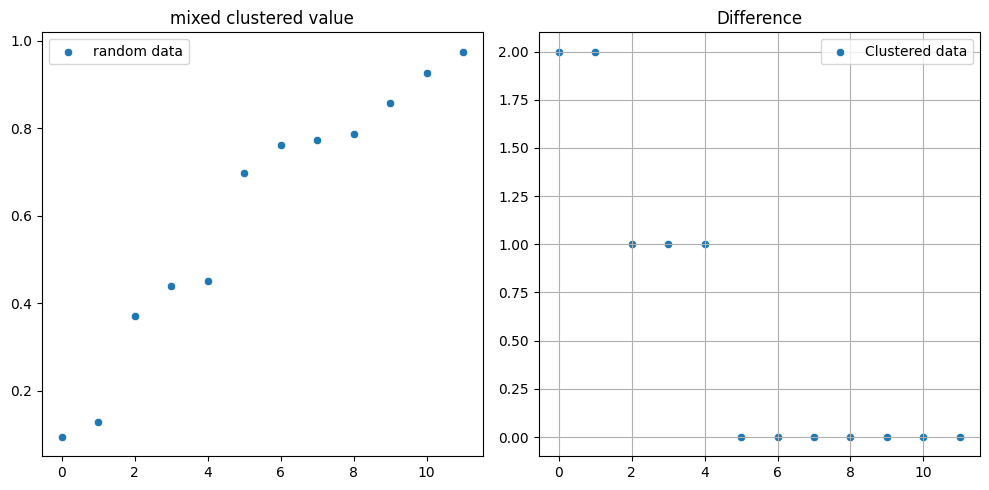

In [7]:
fig,ax=plt.subplots(ncols=2,figsize=(10,5))

sns.scatterplot(data_copy,label='random data',color='tab:blue',ax=ax[0])
ax[0].set(title='mixed clustered value')
ax[0].legend()

sns.scatterplot(predicted_cluster,label='Clustered data',palette='rainbow',ax=ax[1])
ax[1].set(title='Clustered values')
ax[1].legend()

plt.grid()
plt.tight_layout()
plt.title('Difference')
plt.show()

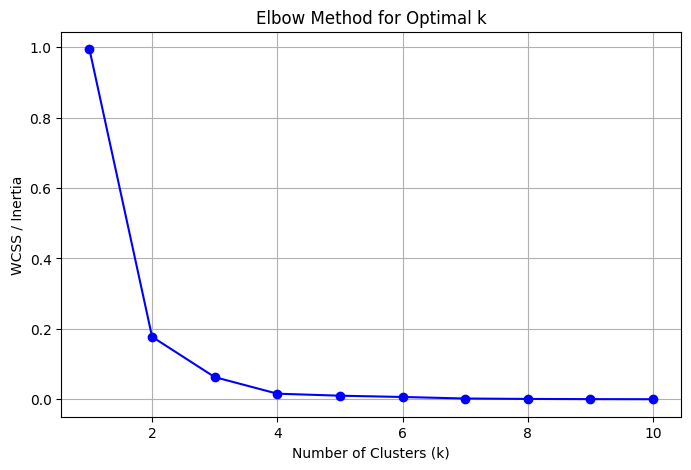

In [8]:
# Store inertia for each k
wcss = []
avg_var=[]
# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_) # inertia is sum of squared distance
    avg_var.append((kmeans.inertia_)/len(data))

# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.grid(True)
plt.show()


In [9]:
print(wcss)

[0.994159974178551, 0.17741976527242442, 0.06293501646345961, 0.015868793699571324, 0.010152811713294137, 0.0065184891393710595, 0.002146269408372646, 0.0009527484590659931, 0.00037691274646339085, 0.00013951619717220395]


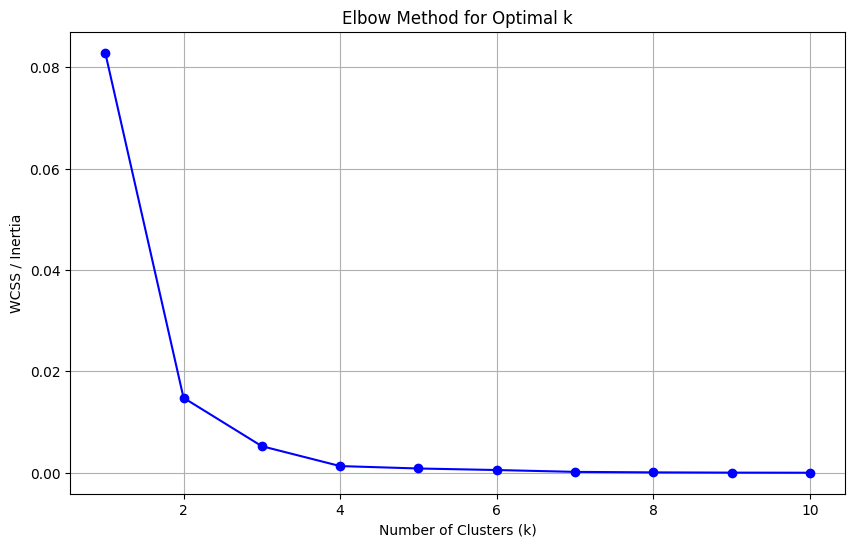

In [10]:
# plot
plt.figure(figsize=(10,6))
plt.plot(range(1,11),avg_var,'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS / Inertia')
plt.grid(True)
plt.show()

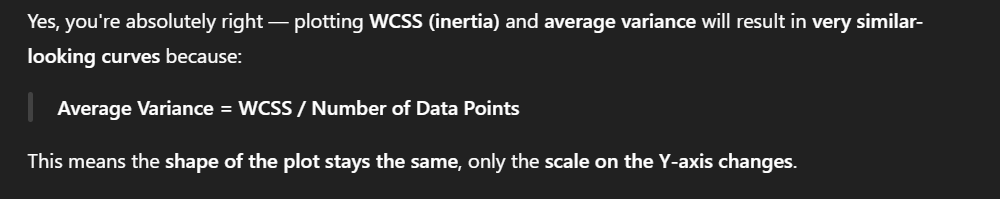

### Creating cluster when data is heatmap

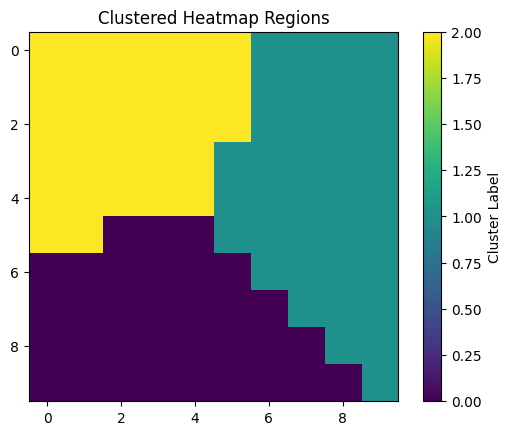

In [11]:

# Step 1: Example heatmap data (like a 2D array of pixel intensities)
np.random.seed(0)
heatmap = np.random.rand(10, 10)

# Step 2: Convert heatmap to (x, y, value) format
x_coords, y_coords = np.meshgrid(np.arange(heatmap.shape[1]), np.arange(heatmap.shape[0]))
points = np.c_[x_coords.ravel(), y_coords.ravel(), heatmap.ravel()]

# Step 3: Apply KMeans on (x, y, value) — or just on value if needed
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(points)

# Step 4: Visualize clustering results
cluster_map = clusters.reshape(heatmap.shape)
plt.imshow(cluster_map, cmap='viridis')
plt.title('Clustered Heatmap Regions')
plt.colorbar(label='Cluster Label')
plt.show()


In [12]:
print(cluster_map) # matrix of cluster when data is in heat map

[[2 2 2 2 2 2 1 1 1 1]
 [2 2 2 2 2 2 1 1 1 1]
 [2 2 2 2 2 2 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [2 2 0 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 1]]


In [13]:
print(heatmap.shape)
print(clusters.shape)

(10, 10)
(100,)


### What is the difference between kmeans and hirerachical clustering?
#### -> main difference is that kmeans develop the cluster on what value of k we give but hirerachical clustering develop cluster on similarity between the points 